In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

tscope_data = pd.read_csv(r"C:\Users\rreck\Desktop\FAU classes\Fall2024\CAP 4770 - Intro Data Mining Machine Learning\telescope_data.csv")
tscope_data = tscope_data.drop(columns = ['class'])
# tscope_data.head()
# tscope_data.info()
tscope_data.columns

Index(['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long',
       'fM3Trans', 'fAlpha', 'fDist'],
      dtype='object')

In [2]:
# 1. Compute the multivariate mean vector.
mean_vector = tscope_data.select_dtypes(include=[np.number]).mean()
print(mean_vector)

fLength      57.675030
fWidth       24.015214
fSize         2.873639
fConc         0.363390
fConc1        0.207434
fAsym        -3.221765
fM3Long      13.136590
fM3Trans      1.791702
fAlpha       31.526518
fDist       197.804527
dtype: float64


In [3]:
# 2. Compute the sample covariance matrix as inner products
centered_data = tscope_data - mean_vector

covariance_matrix_inner = np.dot(centered_data.T, centered_data) / (len(tscope_data) - 1)
print("Covariance Matrix (Inner Products):")
print(covariance_matrix_inner)

Covariance Matrix (Inner Products):
[[ 1.76671060e+03  7.31278208e+02  1.38777613e+01 -4.79597589e+00
  -2.75430985e+00 -3.38521963e+02 -3.17091670e+02  1.34197204e+02
  -4.26995152e+01  1.08850674e+03]
 [ 7.31278208e+02  5.11310810e+02  7.03148837e+00 -2.23083506e+00
  -1.29248588e+00  2.54802711e+02 -4.19194118e+02  7.64208425e+01
   3.46720258e+01  4.56444068e+02]
 [ 1.38777613e+01  7.03148837e+00  2.26271192e-01 -6.74936308e-02
  -3.87883133e-02  4.60739147e-01  1.60894156e+00  6.48693246e-01
  -2.84638820e+00  1.74006840e+01]
 [-4.79597589e+00 -2.23083506e+00 -6.74936308e-02  2.94825044e-02
   1.78747973e-02  3.29189889e-01 -8.84361090e-01 -3.93915412e-01
   1.31979942e+00 -4.61574466e+00]
 [-2.75430985e+00 -1.29248588e+00 -3.87883133e-02  1.78747973e-02
   1.14612948e-02  1.54446386e-01 -6.05826971e-01 -2.09961420e-01
   7.10752532e-01 -2.52378666e+00]
 [-3.38521963e+02  2.54802711e+02  4.60739147e-01  3.29189889e-01
   1.54446386e-01  3.89983867e+03 -2.63597250e+02  1.54963897e+

In [4]:
# 3. Compute the sample covariance matrix as outer products
cov_matrix_outer = np.zeros((tscope_data.shape[1], tscope_data.shape[1]))

for i in range(centered_data.shape[0]):
    outer_product = np.outer(centered_data.iloc[i], centered_data.iloc[i])
    cov_matrix_outer += outer_product

cov_matrix_outer /= (centered_data.shape[0] - 1)

print("Covariance Matrix (Outer Products):")
print(cov_matrix_outer)

Covariance Matrix (Outer Products):
[[ 1.76671060e+03  7.31278208e+02  1.38777613e+01 -4.79597589e+00
  -2.75430985e+00 -3.38521963e+02 -3.17091670e+02  1.34197204e+02
  -4.26995152e+01  1.08850674e+03]
 [ 7.31278208e+02  5.11310810e+02  7.03148837e+00 -2.23083506e+00
  -1.29248588e+00  2.54802711e+02 -4.19194118e+02  7.64208425e+01
   3.46720258e+01  4.56444068e+02]
 [ 1.38777613e+01  7.03148837e+00  2.26271192e-01 -6.74936308e-02
  -3.87883133e-02  4.60739147e-01  1.60894156e+00  6.48693246e-01
  -2.84638820e+00  1.74006840e+01]
 [-4.79597589e+00 -2.23083506e+00 -6.74936308e-02  2.94825044e-02
   1.78747973e-02  3.29189889e-01 -8.84361090e-01 -3.93915412e-01
   1.31979942e+00 -4.61574466e+00]
 [-2.75430985e+00 -1.29248588e+00 -3.87883133e-02  1.78747973e-02
   1.14612948e-02  1.54446386e-01 -6.05826971e-01 -2.09961420e-01
   7.10752532e-01 -2.52378666e+00]
 [-3.38521963e+02  2.54802711e+02  4.60739147e-01  3.29189889e-01
   1.54446386e-01  3.89983867e+03 -2.63597250e+02  1.54963897e+

Correlation between Attribute 1 and 2:  0.7694093096665072


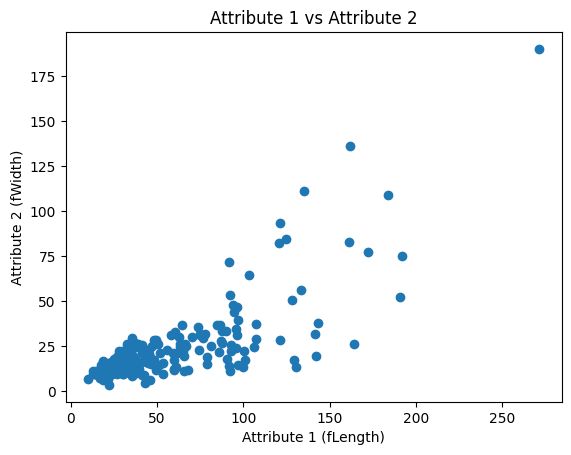

In [5]:
# 4. Correlation between attributes 1 and 2
flength_centered = centered_data.iloc[:, 0]  # Attribute 1
fwidth_centered = centered_data.iloc[:, 1]  # Attribute 2

cosine_similarity = np.dot(flength_centered, fwidth_centered) / (np.linalg.norm(flength_centered) * np.linalg.norm(fwidth_centered))

print("Correlation between Attribute 1 and 2: ", cosine_similarity)

plt.scatter(tscope_data.iloc[:, 0], tscope_data.iloc[:, 1])

# Scatter Plot setup
plt.xlabel('Attribute 1 (fLength)')
plt.ylabel('Attribute 2 (fWidth)')
plt.title('Attribute 1 vs Attribute 2')
plt.show()

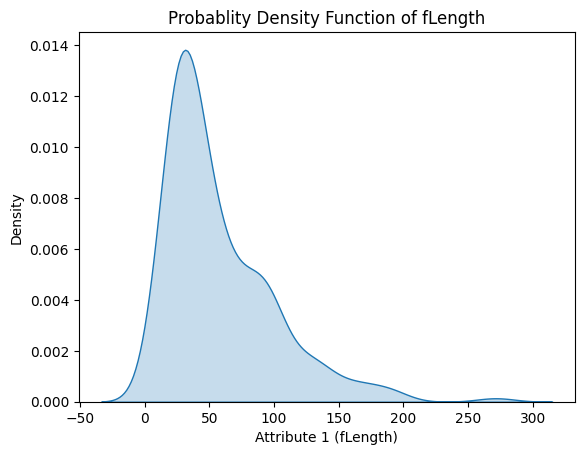

In [6]:
# 5. Probability density function plotted.
sns.kdeplot(tscope_data['fLength'], fill=True)

plt.xlabel('Attribute 1 (fLength)')
plt.ylabel('Density')
plt.title('Probablity Density Function of fLength')

plt.show()

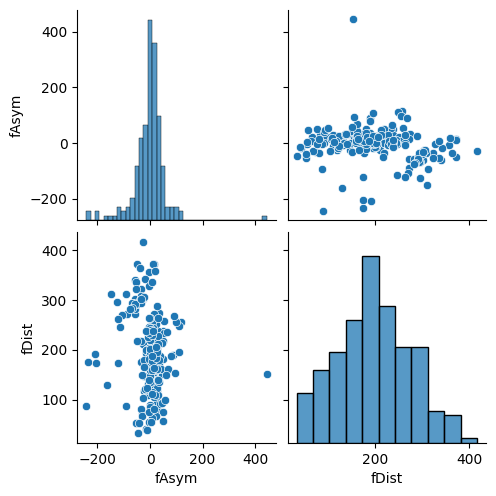

In [7]:
# 6. Pairplot between any two different attributes. (fAsym vs fDist)
sns.pairplot(tscope_data, vars=['fAsym', 'fDist'])

# Show the plot
plt.show()


In [8]:
# 7. Max and Min Variances
tscope_variance_values = tscope_data.var()

max_variance_attribute = tscope_variance_values.idxmax()
max_variance_value = tscope_variance_values.max()

min_variance_attribute = tscope_variance_values.idxmin()
min_variance_value = tscope_variance_values.min()

print ("Largest Variance: \n", max_variance_attribute, " ", max_variance_value) 
print ("Smallest Variance: \n", min_variance_attribute, " ", min_variance_value) 

Largest Variance: 
 fDist   6361.467590825798
Smallest Variance: 
 fConc1   0.011461294765671641


In [9]:
# 8. Max and Min Covariances
tscope_covariance_matrix = tscope_data.cov()

# Masking the Diagonal
masked_covariance = tscope_covariance_matrix.where(np.triu(np.ones(tscope_covariance_matrix.shape), k=1).astype(bool))

max_cov_value = masked_covariance.max().max()
max_cov_pair = masked_covariance.stack().idxmax()

min_cov_value = masked_covariance.min().min()
min_cov_pair = masked_covariance.stack().idxmin()

print("Largest Covariance: \n", max_cov_value, max_cov_pair)
print("Smallest Covariance: \n", min_cov_value, min_cov_pair)

Largest Covariance: 
 1088.5067354049152 ('fLength', 'fDist')
Smallest Covariance: 
 -659.9735489916213 ('fAsym', 'fDist')


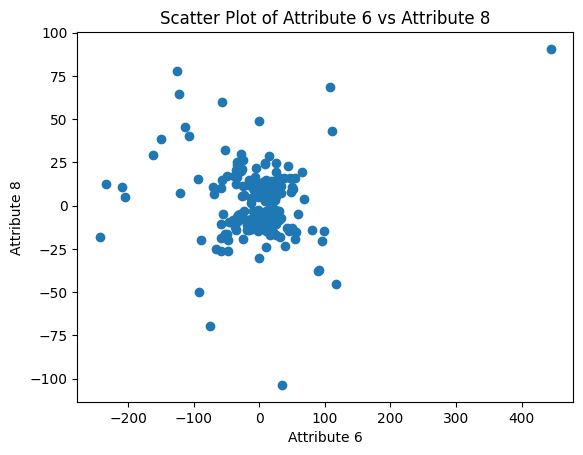

In [10]:
# 9. Attribute 6 vs Attribute 8
attribute_6 = tscope_data.iloc[:, 5]  # Attribute 6
attribute_8 = tscope_data.iloc[:, 7]  # Attribute 8

plt.scatter(attribute_6, attribute_8, marker='o')

plt.xlabel('Attribute 6')
plt.ylabel('Attribute 8')
plt.title('Scatter Plot of Attribute 6 vs Attribute 8')

# Show the plot
plt.show()